In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import socket, struct
import ipaddress
import imblearn
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import LabelEncoder
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline
from imblearn.under_sampling import NearMiss

In [ ]:
df = pd.read_csv("/content/Dataset-Unicauca-Version2-87Atts.csv")
df

,Flow.ID,Source.IP,Source.Port,Destination.IP,Destination.Port,Protocol,Timestamp,Flow.Duration,Total.Fwd.Packets,Total.Backward.Packets,...,Active.Std,Active.Max,Active.Min,Idle.Mean,Idle.Std,Idle.Max,Idle.Min,Label,L7Protocol,ProtocolName
0,172.19.1.46-10.200.7.7-52422-3128-6,172.19.1.46,52422.0,10.200.7.7,3128.0,6.0,26/04/201711:11:17,45523.0,22.0,55.0,...,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,BENIGN,131.0,HTTP_PROXY
1,172.19.1.46-10.200.7.7-52422-3128-6,10.200.7.7,3128.0,172.19.1.46,52422.0,6.0,26/04/201711:11:17,1.0,2.0,0.0,...,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,BENIGN,131.0,HTTP_PROXY
2,10.200.7.217-50.31.185.39-38848-80-6,50.31.185.39,80.0,10.200.7.217,38848.0,6.0,26/04/201711:11:17,1.0,3.0,0.0,...,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,BENIGN,7.0,HTTP
3,10.200.7.217-50.31.185.39-38848-80-6,50.31.185.39,80.0,10.200.7.217,38848.0,6.0,26/04/201711:11:17,217.0,1.0,3.0,...,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,BENIGN,7.0,HTTP
4,192.168.72.43-10.200.7.7-55961-3128-6,192.168.72.43,55961.0,10.200.7.7,3128.0,6.0,26/04/201711:11:17,78068.0,5.0,0.0,...,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,BENIGN,131.0,HTTP_PROXY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1251437,179.1.4.205-10.200.7.217-443-60849-6,10.200.7.217,60849.0,179.1.4.205,443.0,6.0,27/04/201704:31:14,115473354.0,972.0,770.0,...,0.000000e+00,100454804.0,100454804.0,9.777823e+06,0.000000e+00,9777823.0,9777823.0,BENIGN,36.0,EDONKEY
1251438,179.1.4.205-10.200.7.217-443-60848-6,10.200.7.217,60848.0,179.1.4.205,443.0,6.0,27/04/201704:31:14,115472196.0,1092.0,809.0,...,0.000000e+00,100454737.0,100454737.0,9.778017e+06,0.000000e+00,9778017.0,9778017.0,BENIGN,91.0,SSL
1251439,179.1.4.244-10.200.7.217-443-57276-6,10.200.7.217,57276.0,179.1.4.244,443.0,6.0,27/04/201704:31:14,108093483.0,92.0,113.0,...,4.069296e+06,10476391.0,77655.0,1.517533e+07,1.069356e+07,29917444.0,6917911.0,BENIGN,91.0,SSL
1251440,172.217.30.10-10.200.7.217-443-40753-6,10.200.7.217,40753.0,172.217.30.10,443.0,6.0,27/04/201704:31:14,91516946.0,25.0,21.0,...,1.949203e+05,339124.0,702.0,3.015784e+07,2.023923e+05,30390991.0,30027391.0,BENIGN,126.0,GOOGLE


In [ ]:
df.drop('Flow.ID', axis=1, inplace=True)
df


,Source.IP,Source.Port,Destination.IP,Destination.Port,Protocol,Timestamp,Flow.Duration,Total.Fwd.Packets,Total.Backward.Packets,Total.Length.of.Fwd.Packets,...,Active.Std,Active.Max,Active.Min,Idle.Mean,Idle.Std,Idle.Max,Idle.Min,Label,L7Protocol,ProtocolName
0,172.19.1.46,52422.0,10.200.7.7,3128.0,6.0,26/04/201711:11:17,45523.0,22.0,55.0,132.0,...,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,BENIGN,131.0,HTTP_PROXY
1,10.200.7.7,3128.0,172.19.1.46,52422.0,6.0,26/04/201711:11:17,1.0,2.0,0.0,12.0,...,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,BENIGN,131.0,HTTP_PROXY
2,50.31.185.39,80.0,10.200.7.217,38848.0,6.0,26/04/201711:11:17,1.0,3.0,0.0,674.0,...,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,BENIGN,7.0,HTTP
3,50.31.185.39,80.0,10.200.7.217,38848.0,6.0,26/04/201711:11:17,217.0,1.0,3.0,0.0,...,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,BENIGN,7.0,HTTP
4,192.168.72.43,55961.0,10.200.7.7,3128.0,6.0,26/04/201711:11:17,78068.0,5.0,0.0,1076.0,...,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,BENIGN,131.0,HTTP_PROXY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1251437,10.200.7.217,60849.0,179.1.4.205,443.0,6.0,27/04/201704:31:14,115473354.0,972.0,770.0,38082.0,...,0.000000e+00,100454804.0,100454804.0,9.777823e+06,0.000000e+00,9777823.0,9777823.0,BENIGN,36.0,EDONKEY
1251438,10.200.7.217,60848.0,179.1.4.205,443.0,6.0,27/04/201704:31:14,115472196.0,1092.0,809.0,41544.0,...,0.000000e+00,100454737.0,100454737.0,9.778017e+06,0.000000e+00,9778017.0,9778017.0,BENIGN,91.0,SSL
1251439,10.200.7.217,57276.0,179.1.4.244,443.0,6.0,27/04/201704:31:14,108093483.0,92.0,113.0,18372.0,...,4.069296e+06,10476391.0,77655.0,1.517533e+07,1.069356e+07,29917444.0,6917911.0,BENIGN,91.0,SSL
1251440,10.200.7.217,40753.0,172.217.30.10,443.0,6.0,27/04/201704:31:14,91516946.0,25.0,21.0,11652.0,...,1.949203e+05,339124.0,702.0,3.015784e+07,2.023923e+05,30390991.0,30027391.0,BENIGN,126.0,GOOGLE


In [ ]:
df = df.drop(df.index[-1])

In [ ]:
def ip_to_float(ip):
    octets = ip.split('.')
    float_representation = int(octets[0]) * 256**3 + int(octets[1]) * 256**2 + int(octets[2]) * 256 + int(octets[3])
    return float_representation


In [ ]:
df['Source.IP'] = df['Source.IP'].apply(ip_to_float)

In [ ]:
df['Destination.IP'] = df['Destination.IP'].apply(ip_to_float)
df

,Source.IP,Source.Port,Destination.IP,Destination.Port,Protocol,Timestamp,Flow.Duration,Total.Fwd.Packets,Total.Backward.Packets,Total.Length.of.Fwd.Packets,...,Active.Std,Active.Max,Active.Min,Idle.Mean,Idle.Std,Idle.Max,Idle.Min,Label,L7Protocol,ProtocolName
0,2886926638,52422.0,180881159,3128.0,6.0,26/04/201711:11:17,45523.0,22.0,55.0,132.0,...,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,BENIGN,131.0,HTTP_PROXY
1,180881159,3128.0,2886926638,52422.0,6.0,26/04/201711:11:17,1.0,2.0,0.0,12.0,...,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,BENIGN,131.0,HTTP_PROXY
2,840939815,80.0,180881369,38848.0,6.0,26/04/201711:11:17,1.0,3.0,0.0,674.0,...,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,BENIGN,7.0,HTTP
3,840939815,80.0,180881369,38848.0,6.0,26/04/201711:11:17,217.0,1.0,3.0,0.0,...,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,BENIGN,7.0,HTTP
4,3232253995,55961.0,180881159,3128.0,6.0,26/04/201711:11:17,78068.0,5.0,0.0,1076.0,...,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,BENIGN,131.0,HTTP_PROXY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1251436,180881369,43219.0,3627736782,443.0,6.0,27/04/201704:31:13,115647721.0,155.0,226.0,31860.0,...,1.172291e+06,5381715.0,125948.0,5.159453e+06,2.146917e+05,6070674.0,5079289.0,BENIGN,126.0,GOOGLE
1251437,180881369,60849.0,3003188429,443.0,6.0,27/04/201704:31:14,115473354.0,972.0,770.0,38082.0,...,0.000000e+00,100454804.0,100454804.0,9.777823e+06,0.000000e+00,9777823.0,9777823.0,BENIGN,36.0,EDONKEY
1251438,180881369,60848.0,3003188429,443.0,6.0,27/04/201704:31:14,115472196.0,1092.0,809.0,41544.0,...,0.000000e+00,100454737.0,100454737.0,9.778017e+06,0.000000e+00,9778017.0,9778017.0,BENIGN,91.0,SSL
1251439,180881369,57276.0,3003188468,443.0,6.0,27/04/201704:31:14,108093483.0,92.0,113.0,18372.0,...,4.069296e+06,10476391.0,77655.0,1.517533e+07,1.069356e+07,29917444.0,6917911.0,BENIGN,91.0,SSL


In [ ]:
df.isnull().values.any()

False

In [ ]:
print(df.dtypes)

Source.IP             int64
Source.Port         float64
Destination.IP        int64
Destination.Port    float64
Protocol            float64
                     ...   
Idle.Std            float64
Idle.Max            float64
Idle.Min            float64
L7Protocol          float64
ProtocolName         object
Length: 84, dtype: object


In [ ]:
df.drop('Timestamp', axis=1, inplace=True)
df

,Source.IP,Source.Port,Destination.IP,Destination.Port,Protocol,Flow.Duration,Total.Fwd.Packets,Total.Backward.Packets,Total.Length.of.Fwd.Packets,Total.Length.of.Bwd.Packets,...,Active.Std,Active.Max,Active.Min,Idle.Mean,Idle.Std,Idle.Max,Idle.Min,Label,L7Protocol,ProtocolName
0,2886926638,52422.0,180881159,3128.0,6.0,45523.0,22.0,55.0,132.0,110414.0,...,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,BENIGN,131.0,HTTP_PROXY
1,180881159,3128.0,2886926638,52422.0,6.0,1.0,2.0,0.0,12.0,0.0,...,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,BENIGN,131.0,HTTP_PROXY
2,840939815,80.0,180881369,38848.0,6.0,1.0,3.0,0.0,674.0,0.0,...,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,BENIGN,7.0,HTTP
3,840939815,80.0,180881369,38848.0,6.0,217.0,1.0,3.0,0.0,0.0,...,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,BENIGN,7.0,HTTP
4,3232253995,55961.0,180881159,3128.0,6.0,78068.0,5.0,0.0,1076.0,0.0,...,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,BENIGN,131.0,HTTP_PROXY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1251436,180881369,43219.0,3627736782,443.0,6.0,115647721.0,155.0,226.0,31860.0,48757.0,...,1.172291e+06,5381715.0,125948.0,5.159453e+06,2.146917e+05,6070674.0,5079289.0,BENIGN,126.0,GOOGLE
1251437,180881369,60849.0,3003188429,443.0,6.0,115473354.0,972.0,770.0,38082.0,1551891.0,...,0.000000e+00,100454804.0,100454804.0,9.777823e+06,0.000000e+00,9777823.0,9777823.0,BENIGN,36.0,EDONKEY
1251438,180881369,60848.0,3003188429,443.0,6.0,115472196.0,1092.0,809.0,41544.0,1557641.0,...,0.000000e+00,100454737.0,100454737.0,9.778017e+06,0.000000e+00,9778017.0,9778017.0,BENIGN,91.0,SSL
1251439,180881369,57276.0,3003188468,443.0,6.0,108093483.0,92.0,113.0,18372.0,3262.0,...,4.069296e+06,10476391.0,77655.0,1.517533e+07,1.069356e+07,29917444.0,6917911.0,BENIGN,91.0,SSL


In [ ]:
df.columns[df.nunique() <= 1]

Index(['Bwd.PSH.Flags', 'Fwd.URG.Flags', 'Bwd.URG.Flags', 'CWE.Flag.Count',
       'Fwd.Avg.Bytes.Bulk', 'Fwd.Avg.Packets.Bulk', 'Fwd.Avg.Bulk.Rate',
       'Bwd.Avg.Bytes.Bulk', 'Bwd.Avg.Packets.Bulk', 'Bwd.Avg.Bulk.Rate',
       'Label'],
      dtype='object')

In [ ]:
df['ProtocolName'].value_counts()

GOOGLE          310397
HTTP            292963
HTTP_PROXY      198300
SSL             147118
HTTP_CONNECT    115059
                 ...  
OSCAR                2
OPENVPN              2
STARCRAFT            2
NFS                  1
RTMP                 1
Name: ProtocolName, Length: 62, dtype: int64

In [ ]:
feats_toDelete = df['ProtocolName'].value_counts()[-25:].index
feats_toDelete

Index(['UBUNTUONE', 'EASYTAXI', 'FTP_DATA', 'SSH', 'WAZE', 'NTP', 'DEEZER',
       'UNENCRYPED_JABBER', 'EDONKEY', 'TWITCH', 'ORACLE', 'CITRIX',
       'WHOIS_DAS', 'OPENSIGNAL', 'SKINNY', 'MSSQL', 'UPNP', 'MAIL_IMAPS',
       'TEAMSPEAK', 'SIMET', 'OSCAR', 'OPENVPN', 'STARCRAFT', 'NFS', 'RTMP'],
      dtype='object')

<Axes: title={'center': 'Occurance'}>

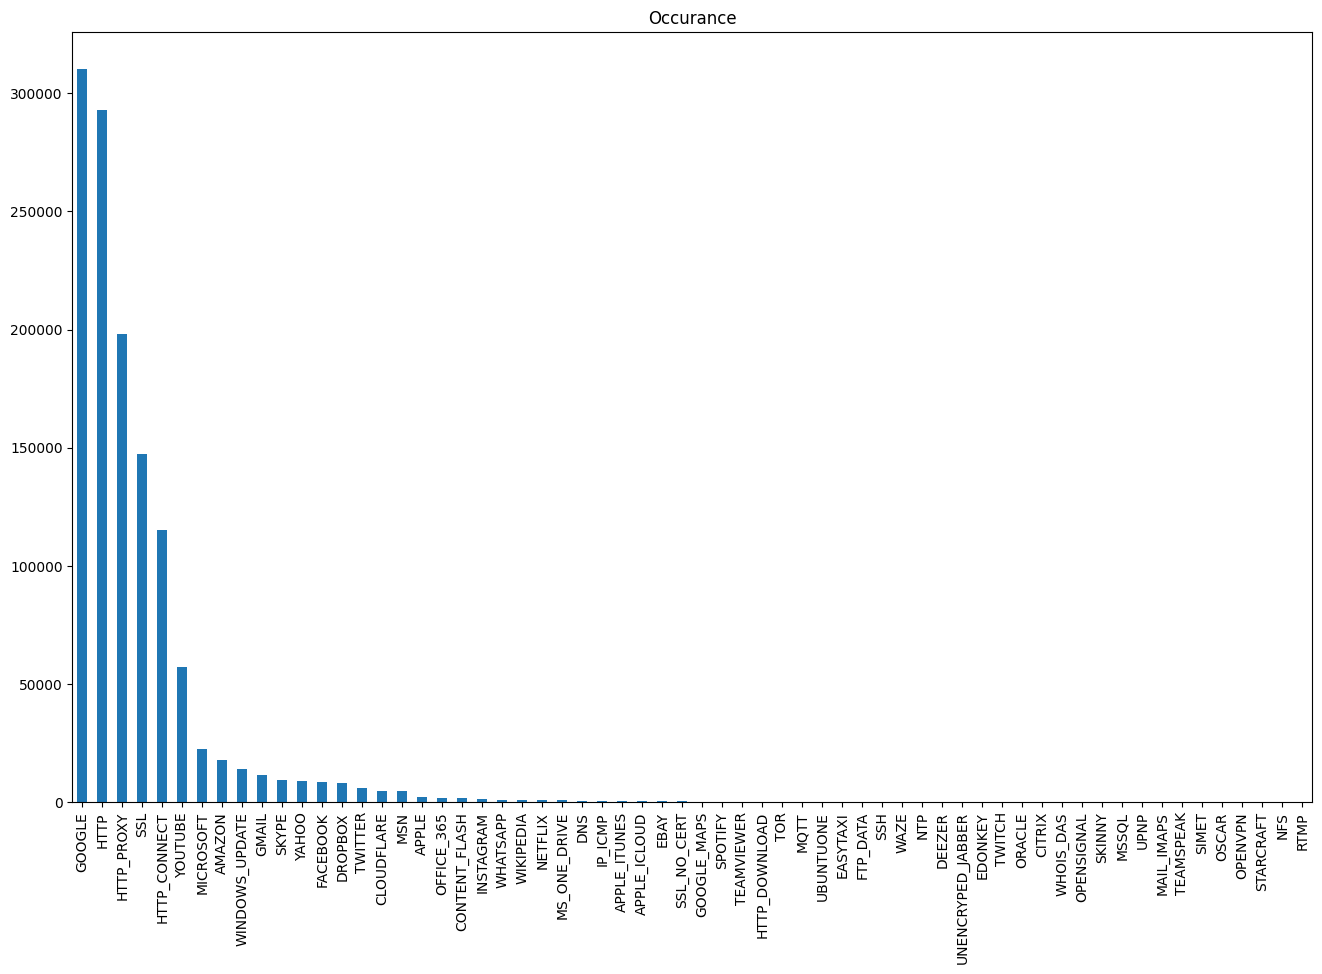

In [ ]:
target_count = df['ProtocolName'].value_counts()
plt.figure(figsize=(16,10))
target_count.plot(kind='bar', title='Occurance')

In [ ]:
df = df[~df.ProtocolName.isin(feats_toDelete)]

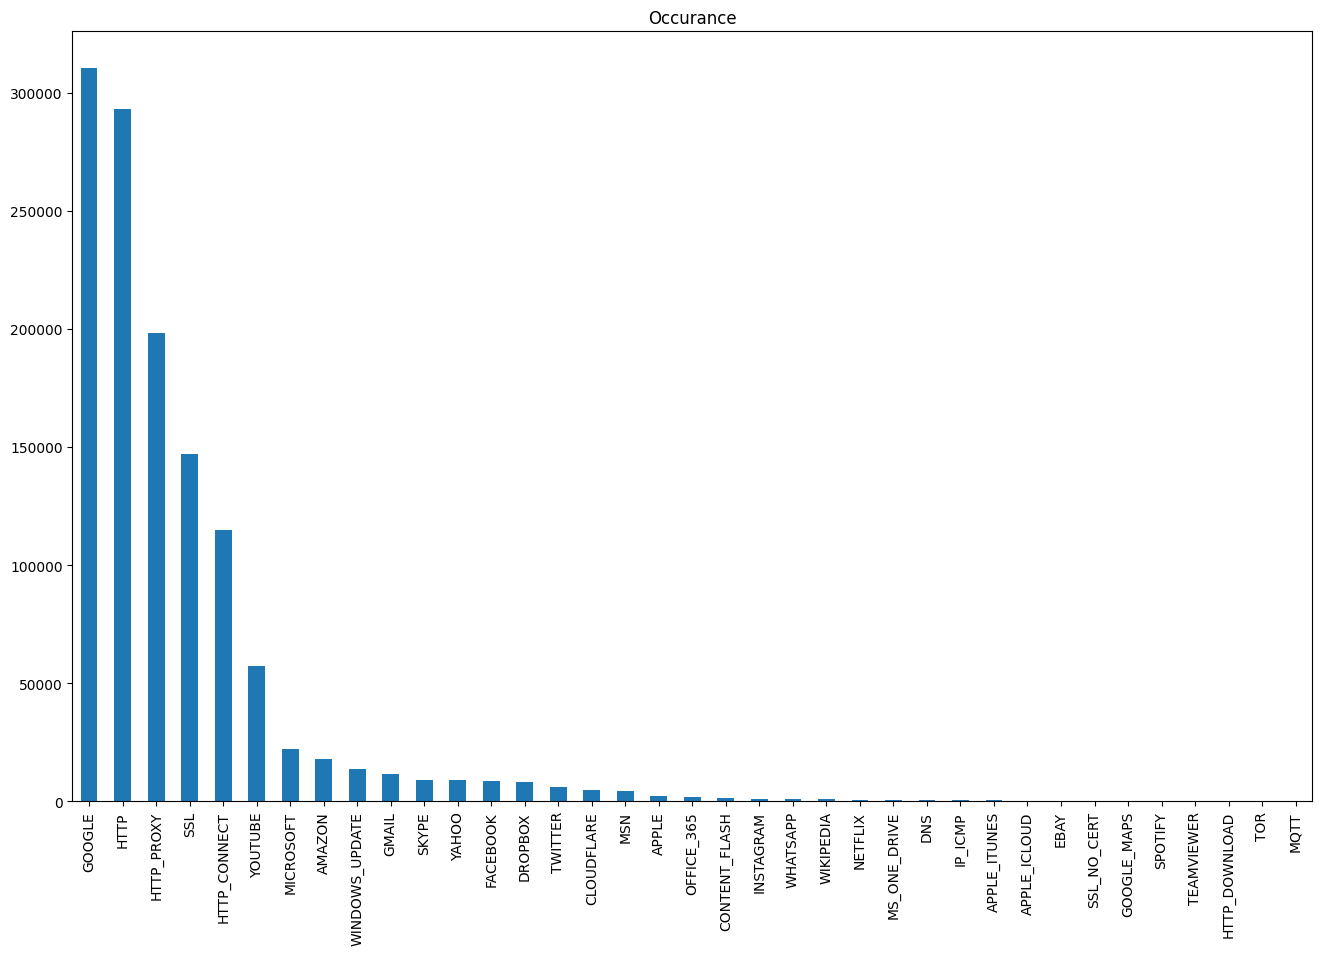

In [ ]:
target_count2 = df['ProtocolName'].value_counts()
plt.figure(figsize=(16,10))
target_count2.plot(kind='bar', title='Occurance');


In [ ]:
df.drop('Label', axis=1, inplace=True)
df

<ipython-input-27-b6d32b185789>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('Label', axis=1, inplace=True)


,Source.IP,Source.Port,Destination.IP,Destination.Port,Protocol,Flow.Duration,Total.Fwd.Packets,Total.Backward.Packets,Total.Length.of.Fwd.Packets,Total.Length.of.Bwd.Packets,...,Active.Mean,Active.Std,Active.Max,Active.Min,Idle.Mean,Idle.Std,Idle.Max,Idle.Min,L7Protocol,ProtocolName
0,2886926638,52422.0,180881159,3128.0,6.0,45523.0,22.0,55.0,132.0,110414.0,...,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,131.0,HTTP_PROXY
1,180881159,3128.0,2886926638,52422.0,6.0,1.0,2.0,0.0,12.0,0.0,...,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,131.0,HTTP_PROXY
2,840939815,80.0,180881369,38848.0,6.0,1.0,3.0,0.0,674.0,0.0,...,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,7.0,HTTP
3,840939815,80.0,180881369,38848.0,6.0,217.0,1.0,3.0,0.0,0.0,...,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,7.0,HTTP
4,3232253995,55961.0,180881159,3128.0,6.0,78068.0,5.0,0.0,1076.0,0.0,...,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,131.0,HTTP_PROXY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1251435,180881369,43376.0,3003188448,443.0,6.0,115107677.0,150.0,200.0,19822.0,65502.0,...,5.089585e+06,0.000000e+00,5089585.0,5089585.0,9.910658e+06,0.000000e+00,9910658.0,9910658.0,91.0,SSL
1251436,180881369,43219.0,3627736782,443.0,6.0,115647721.0,155.0,226.0,31860.0,48757.0,...,4.014264e+05,1.172291e+06,5381715.0,125948.0,5.159453e+06,2.146917e+05,6070674.0,5079289.0,126.0,GOOGLE
1251438,180881369,60848.0,3003188429,443.0,6.0,115472196.0,1092.0,809.0,41544.0,1557641.0,...,1.004547e+08,0.000000e+00,100454737.0,100454737.0,9.778017e+06,0.000000e+00,9778017.0,9778017.0,91.0,SSL
1251439,180881369,57276.0,3003188468,443.0,6.0,108093483.0,92.0,113.0,18372.0,3262.0,...,2.823717e+06,4.069296e+06,10476391.0,77655.0,1.517533e+07,1.069356e+07,29917444.0,6917911.0,91.0,SSL


In [ ]:
feats = [x for x in df.columns if x != 'ProtocolName']
X = df[feats].astype(float)
Y = df['ProtocolName']

In [ ]:
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)

In [ ]:
print(sorted(Counter(Y).items()))

[('AMAZON', 17925), ('APPLE', 2215), ('APPLE_ICLOUD', 357), ('APPLE_ITUNES', 387), ('CLOUDFLARE', 4832), ('CONTENT_FLASH', 1638), ('DNS', 617), ('DROPBOX', 8241), ('EBAY', 351), ('FACEBOOK', 8675), ('GMAIL', 11651), ('GOOGLE', 310397), ('GOOGLE_MAPS', 216), ('HTTP', 292963), ('HTTP_CONNECT', 115059), ('HTTP_DOWNLOAD', 170), ('HTTP_PROXY', 198300), ('INSTAGRAM', 1201), ('IP_ICMP', 587), ('MICROSOFT', 22283), ('MQTT', 107), ('MSN', 4528), ('MS_ONE_DRIVE', 723), ('NETFLIX', 802), ('OFFICE_365', 1660), ('SKYPE', 9143), ('SPOTIFY', 193), ('SSL', 147118), ('SSL_NO_CERT', 326), ('TEAMVIEWER', 171), ('TOR', 130), ('TWITTER', 6029), ('WHATSAPP', 971), ('WIKIPEDIA', 819), ('WINDOWS_UPDATE', 13831), ('YAHOO', 9030), ('YOUTUBE', 57154)]


In [ ]:
print(sorted(Counter(encoded_Y).items()))

[(0, 17925), (1, 2215), (2, 357), (3, 387), (4, 4832), (5, 1638), (6, 617), (7, 8241), (8, 351), (9, 8675), (10, 11651), (11, 310397), (12, 216), (13, 292963), (14, 115059), (15, 170), (16, 198300), (17, 1201), (18, 587), (19, 22283), (20, 107), (21, 4528), (22, 723), (23, 802), (24, 1660), (25, 9143), (26, 193), (27, 147118), (28, 326), (29, 171), (30, 130), (31, 6029), (32, 971), (33, 819), (34, 13831), (35, 9030), (36, 57154)]


In [ ]:
dict_nearMiss = {
"GOOGLE":            10000,
"HTTP":              10000,
"HTTP_PROXY":        10000,
"SSL":               10000,
"HTTP_CONNECT":      10000,
"YOUTUBE":           10000,
"AMAZON":             10000,
"MICROSOFT":          10000,
"GMAIL":              10000,
"WINDOWS_UPDATE":     10000,
"SKYPE":              9000,
"FACEBOOK":           8000,
"DROPBOX":            8000,
"YAHOO":              9000,
"TWITTER":            6000,
"CLOUDFLARE":         4000,
"MSN":                4000,
}

In [ ]:
dict_smote = { "CONTENT_FLASH":       10000,
"APPLE":               10000,
"OFFICE_365":        10000,
"WHATSAPP":            10000,
"INSTAGRAM":          10000,
"WIKIPEDIA":           10000,
"MS_ONE_DRIVE":        10000,
"DNS":                 10000,
"IP_ICMP":             10000,
"NETFLIX":             10000,
"APPLE_ITUNES":        10000,
"SPOTIFY":             10000,
"APPLE_ICLOUD":        10000,
"EBAY":               10000,
"SSL_NO_CERT":          10000,
"GOOGLE_MAPS":          10000,
"TEAMVIEWER":           10000,
"HTTP_DOWNLOAD":        10000,
"MQTT":                 10000,
"TOR":                  10000
}
print(dict_smote)

{'CONTENT_FLASH': 10000, 'APPLE': 10000, 'OFFICE_365': 10000, 'WHATSAPP': 10000, 'INSTAGRAM': 10000, 'WIKIPEDIA': 10000, 'MS_ONE_DRIVE': 10000, 'DNS': 10000, 'IP_ICMP': 10000, 'NETFLIX': 10000, 'APPLE_ITUNES': 10000, 'SPOTIFY': 10000, 'APPLE_ICLOUD': 10000, 'EBAY': 10000, 'SSL_NO_CERT': 10000, 'GOOGLE_MAPS': 10000, 'TEAMVIEWER': 10000, 'HTTP_DOWNLOAD': 10000, 'MQTT': 10000, 'TOR': 10000}


In [ ]:
pipe = make_pipeline(
    SMOTE(sampling_strategy=dict_smote),
    NearMiss(sampling_strategy=dict_nearMiss)
)

In [ ]:
X_resampled, y_resampled = pipe.fit_resample(X, Y)

In [ ]:
print("Shape pierwotnego pliku " + str(df.shape))

Shape pierwotnego pliku (1250800, 84)


In [ ]:
print("Shape X " + str(X.shape))

Shape X (1250800, 83)


In [ ]:
print("Shape Y " + str(Y.shape))

Shape Y (1250800,)


In [ ]:
new_dataframe = pd.DataFrame(data = X, columns = feats)

In [ ]:
new_dataframe['ProtocolName'] = Y

In [ ]:
new_dataframe.describe()

,Source.IP,Source.Port,Destination.IP,Destination.Port,Protocol,Flow.Duration,Total.Fwd.Packets,Total.Backward.Packets,Total.Length.of.Fwd.Packets,Total.Length.of.Bwd.Packets,...,min_seg_size_forward,Active.Mean,Active.Std,Active.Max,Active.Min,Idle.Mean,Idle.Std,Idle.Max,Idle.Min,L7Protocol
count,1.250800e+06,1.250800e+06,1.250800e+06,1.250800e+06,1.250800e+06,1.250800e+06,1.250800e+06,1.250800e+06,1.250800e+06,1.250800e+06,...,1.250800e+06,1.250800e+06,1.250800e+06,1.250800e+06,1.250800e+06,1.250800e+06,1.250800e+06,1.250800e+06,1.250800e+06,1.250800e+06
mean,1.366287e+09,3.574325e+04,1.570750e+09,1.330140e+04,6.004865e+00,2.255413e+07,5.889394e+01,6.359213e+01,3.990406e+04,9.813914e+04,...,2.570393e+01,3.127911e+05,1.763589e+05,5.262603e+05,1.854469e+05,7.558607e+06,1.201079e+06,8.619559e+06,6.444393e+06,9.734437e+01
std,1.467172e+09,2.284163e+04,1.408373e+09,2.133183e+04,3.187528e-01,3.817215e+07,1.027287e+03,1.260314e+03,1.640499e+06,2.863395e+06,...,6.022302e+00,2.456402e+06,1.274124e+06,3.328936e+06,2.164522e+06,1.630104e+07,4.526634e+06,1.801092e+07,1.527264e+07,5.420284e+01
min,8.449873e+07,0.000000e+00,6.817647e+07,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,-1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.000000e+00
25%,1.808813e+08,3.128000e+03,1.808812e+08,4.430000e+02,6.000000e+00,6.070000e+02,2.000000e+00,1.000000e+00,6.000000e+00,0.000000e+00,...,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.100000e+01
50%,1.808814e+08,4.768800e+04,1.089060e+09,3.128000e+03,6.000000e+00,3.788370e+05,5.000000e+00,4.000000e+00,3.360000e+02,9.000000e+01,...,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.260000e+02
75%,3.232246e+09,5.324200e+04,3.003188e+09,3.128000e+03,6.000000e+00,2.774969e+07,1.500000e+01,1.500000e+01,1.735000e+03,3.684000e+03,...,3.200000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.300000e+02
max,3.651355e+09,6.553400e+04,3.754586e+09,6.553400e+04,1.700000e+01,1.200000e+08,3.286950e+05,5.421960e+05,6.780236e+08,1.345796e+09,...,4.800000e+01,1.141773e+08,7.225154e+07,1.141773e+08,1.141773e+08,1.200000e+08,7.516046e+07,1.200000e+08,1.200000e+08,2.220000e+02


In [ ]:
new_dataframe.to_csv('KaggleImbalanced.csv', index=False)